<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/%ED%98%BC%EA%B3%B5%EB%A8%B8Colab%EC%98%88%EC%A0%9C/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝을 하는 사람들에게는 없어서는 안되는 사이트 : [Kaggle](https://www.kaggle.com/)\
Kaggle에서 경연 대회에 참여할 수도 있고, 많은 데이터셋과 참고자료를 열람할 수 있다.

In [ ]:
import matplotlib.pyplot as plt #matplotlib의 pylot 함수를 plt로 줄여서 사용하겠다는 것

pyplot함수는 데이터를 선 그래프 형태(**표**)로 시각화할때 사용됨

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

[도미 데이터셋 출처](https://gist.github.com/rickiepark/b37d04a95a42ef6757e4a99214d61697)\
[빙어 데이터셋 출처](https://gist.github.com/rickiepark/1e89fe2a9d4ad92bc9f073163c9a37a7)



각 생선의 특징을 길이와 뭄게로 표현한 것인데, 이 것을 **특성(feature)**이라고 한다.\
특성은 데이터의 특징을 말한다.

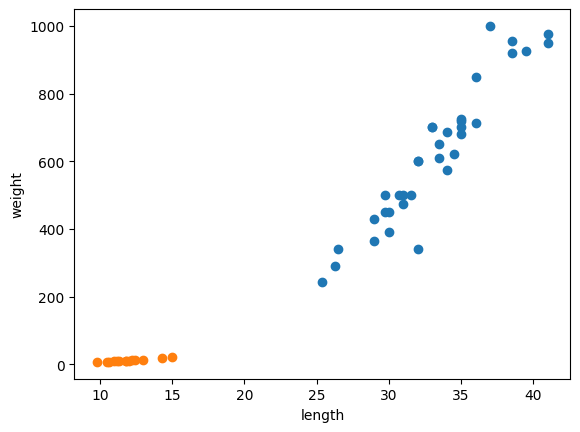

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') #x축은 길이
plt.ylabel('weight') #y축은 무게
plt.show()

맷플롯립에서 2개의 산점도를 그리는 법은 scatter() 메소드를 연달아 이용하는 것이다.\
도미 35마리를 2차원 그래프에 점으로 나타냈다.\
도미의 길이가 길수록 무게가 많이 나가는 것을 위 그래프로 확인할 수 있다.\
이렇게 산점도 그래프가 일직선에 가까운 형태를 **선형적**이라고 한다.\
**파란색은 방어, 주황색은 빙어에 해당**



---



<h1>k-최근접 이웃 알고리즘</h1>

In [ ]:
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

In [ ]:
fish_data = [[l,w]for l, w in zip(length,weight)]

**zip()함수와 리스트 내포 구문**을 이용해 2차원 리스트를 구현하고 있다.\
length와 weight 리스트에서 원소를 하나씩 꺼내 l, w에 할당해 [l,w]인 2차원 리스트가 만들어 지는 것

In [ ]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


도미와 빙어 데이터가 혼재된 2차원 리스트 fish_data가 생성됐다.\
여기서 도미와 빙어를 구분하는 머신러닝을 만들어보자.

In [ ]:
fish_target =[1]*35+[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


도미는 35마리, 빙어는 14마리이므로 도미일땐 1, 빙어일땐 0으로 이분법적으로 구분하는 것

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

사이킷런 패키지로 k-최근접 이웃 알고리즘을 구현\
k-최근접 이웃 알고리즘은 가장 가까운 데이터를 보고 다수결의 원칙을 따르는 방법이다.

In [ ]:
kn.fit(fish_data, fish_target) #fish_data와 fish_target 데이터값을 기반으로 훈련
kn.score(fish_data,fish_target) #훈련 정확도 0(최저)~1(최고)

1.0

k-최근접 이웃 알고리즘을 이용해 fish_data와 fish_target을 훈련시킨 결과 해당 모델이 정확하게 도미와 빙어를 분류해냈음을 알 수 있다.

In [ ]:
kn.predict([[30,600]])

array([1])

도미일 것으로 예상한 것

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

매개변수를 49로 잡았을때 정확도가 떨어진다 >> 수정 필요

In [ ]:
print(35/49)

0.7142857142857143
